In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = requests.get(URL)
ratings_url = io.StringIO(resp.text)
ratings_df = pd.read_csv(ratings_url)
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ï»¿minority      463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

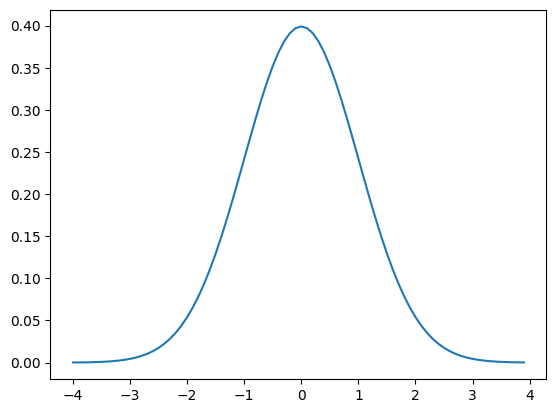

In [5]:
#Normal Distribution
from scipy.stats import norm

# Plot between -4 and 4 with 0.1 steps.
x_axis = np.arange(-4, 4, 0.1)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

In [6]:
#Find the mean and standard deviation of teachers' evaluation scores
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


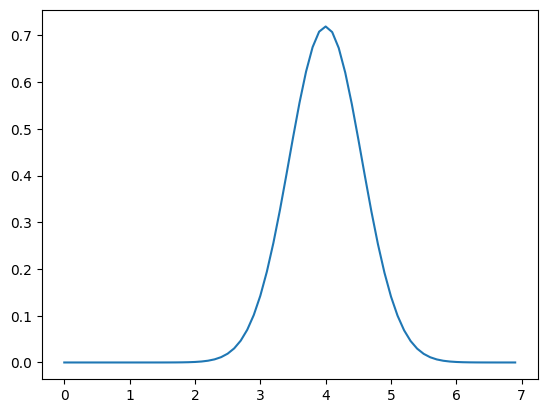

In [9]:
x_axis = np.arange(0, 7, 0.1)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis, eval_mean, eval_sd))
plt.show()

In [8]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


In [13]:
#Using the teachers' rating dataset, what is the probability of receiving an evaluation 
#score greater than 3.5 and less than 4.2
prob1 = scipy.stats.norm.cdf((3.5 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


In [14]:
prob2 = scipy.stats.norm.cdf((4.2 - eval_mean)/eval_sd)
print(prob2)

0.642057540461896


In [15]:
#The probability of a teacher receiving an evaluation score that is between 3.5 and 4.2 is:
round((prob2 - prob1)*100, 1)

45.7

Question 1: Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.3?


In [17]:
prob3 = 1 - scipy.stats.norm.cdf((3.3 - eval_mean)/eval_sd)
print(prob3)

0.8957422041794154


Question 2: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [19]:
prob_3 = scipy.stats.norm.cdf((3 - eval_mean)/eval_sd)
print(prob_3)
prob_2 = scipy.stats.norm.cdf((2 - eval_mean)/eval_sd)
print(prob_2)
round((prob_3 - prob_2)*100, 1)

0.03607280250262359
0.00015910859015753364


3.6

Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day for the past one year have their IQ tested.
Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100

In [21]:
iqs = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
sample_size = len(iqs)
degree_freedom = sample_size - 1
iq_mean = sum(iqs) / sample_size
mean_diff = [(iq - iq_mean) ** 2 for iq in iqs]
iq_std = sqrt(sum(mean_diff) / degree_freedom)
variance = iq_std ** 2
print(f"IQ mean is {iq_mean}, sd is {iq_std}, variance is {variance}")
round(1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_std/sqrt(12))), 3)


IQ mean is 106.0, sd is 8.831760866327848, variance is 78.00000000000001


0.009